In [25]:
import os
os.chdir('/Users/rv/Projects/7CS074') # Change to the project root directory

import pandas as pd

import global_vars 

In [26]:
# First we will check and run the preprocessing script
# In case this is already done, this will not overwrite existing files
from preprocessing import process_raw_multiple_data_files

process_raw_multiple_data_files()

In [27]:
if not os.path.exists(global_vars.DATASET_CLEAN_FILE_PATH):
    raise FileNotFoundError(f"Dataset not found at {global_vars.DATASET_CLEAN_FILE_PATH}. Please ensure the dataset is placed correctly.")

df = pd.read_csv(global_vars.DATASET_CLEAN_FILE_PATH, sep=',', engine='python') # read with proper delimiter handling, and with python engine always
if df.empty:
    raise ValueError("Loaded dataset is empty. Please check the dataset file.")

print(f"Data loaded successfully from {global_vars.DATASET_CLEAN_FILE_PATH}.")

Data loaded successfully from /Users/rv/Projects/7CS074/data/clean/cleaned_dataset.csv.


In [28]:
from association_rules import mine_association_rules

rules_df = mine_association_rules(
    df,
    features=global_vars.ASSOCIATION_RULES,
    min_support=0.02,
    min_confidence=0.1,
    min_lift=1.2,
    metric='lift'
)

In [29]:
from evaluation import get_rules_summary, interpret_rules

if not rules_df.empty:
    summary = get_rules_summary(rules_df)

    print(f"\nASSOCIATION RULES SUMMARY:")
    print(f"  Total rules found: {summary['total_rules']}")
    print(f"  Average support: {summary['avg_support']:.3f}")
    print(f"  Average confidence: {summary['avg_confidence']:.3f}")
    print(f"  Average lift: {summary['avg_lift']:.3f}")
    print(f"  Maximum lift: {summary['max_lift']:.3f}")
    
    interpret_rules(rules_df, top_n=25)
else:
    print("\nNo association rules found with the given thresholds.")
    print("Try lowering min_support or min_confidence values.")


ASSOCIATION RULES SUMMARY:
  Total rules found: 12781
  Average support: 0.050
  Average confidence: 0.446
  Average lift: 2.089
  Maximum lift: 13.248

TOP 25 ASSOCIATION RULES

Rule 700:
  IF engine_category = Large-Engine
  THEN price_category = Luxury, make = bmw
  Support: 0.020 | Confidence: 0.559 | Lift: 13.248
  → This means: 55.9% of cars with engine_category = Large-Engine
    also have price_category = Luxury, make = bmw
    (This is 13.25x more likely than random)

Rule 699:
  IF price_category = Luxury, make = bmw
  THEN engine_category = Large-Engine
  Support: 0.020 | Confidence: 0.484 | Lift: 13.248
  → This means: 48.4% of cars with price_category = Luxury, make = bmw
    also have engine_category = Large-Engine
    (This is 13.25x more likely than random)

Rule 12739:
  IF fuelType = Petrol, mileage_category = Low-Mileage, efficiency_category = High-Efficiency, price_category = Premium
  THEN engine_category = Small-Engine, make = mercedes
  Support: 0.020 | Confiden

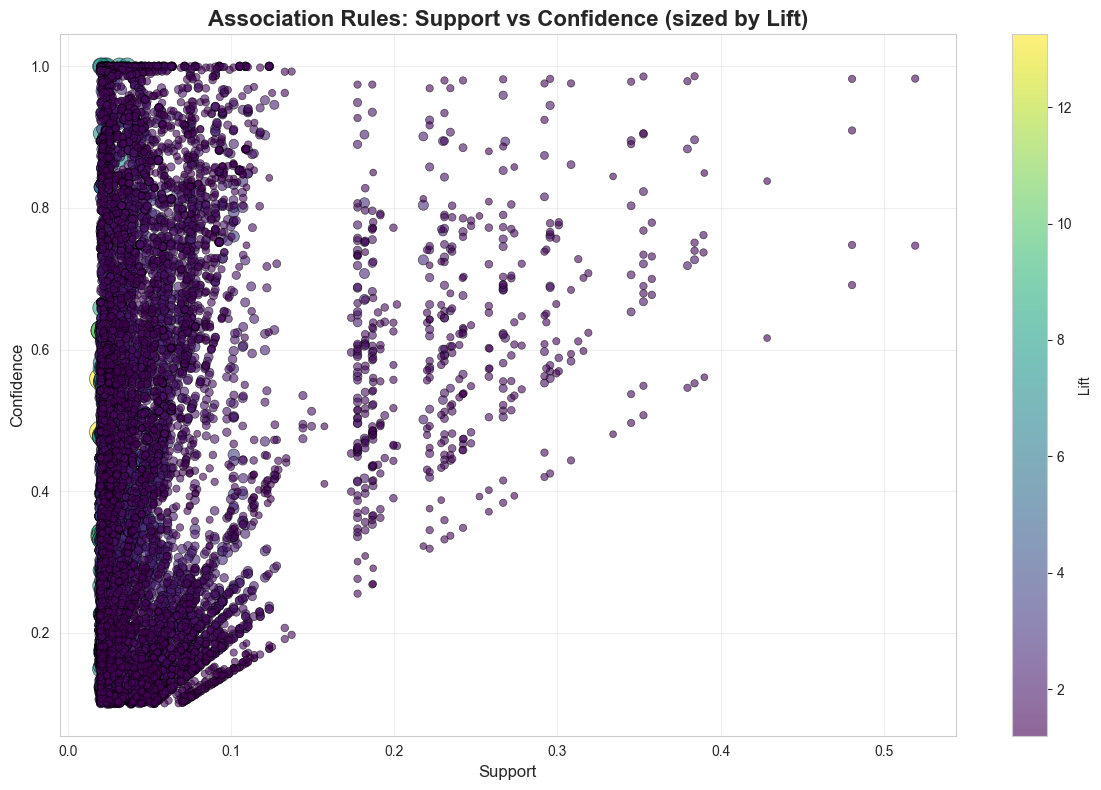

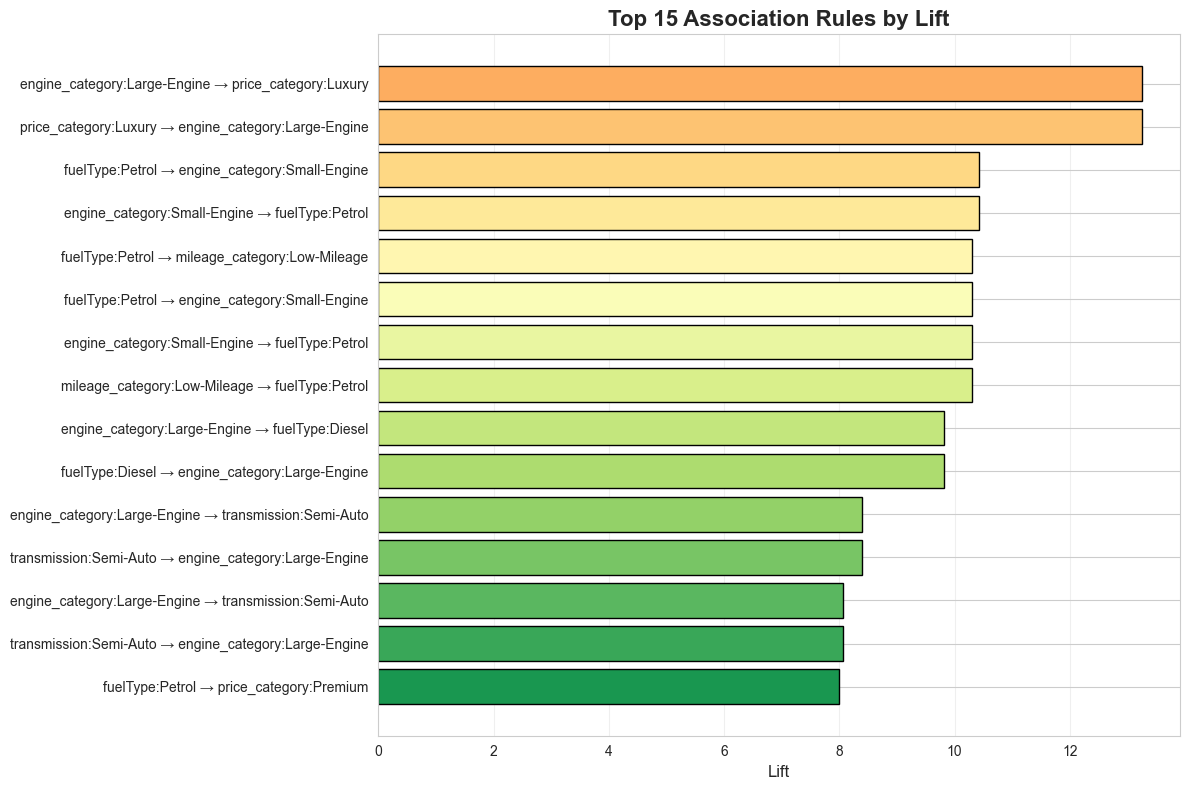

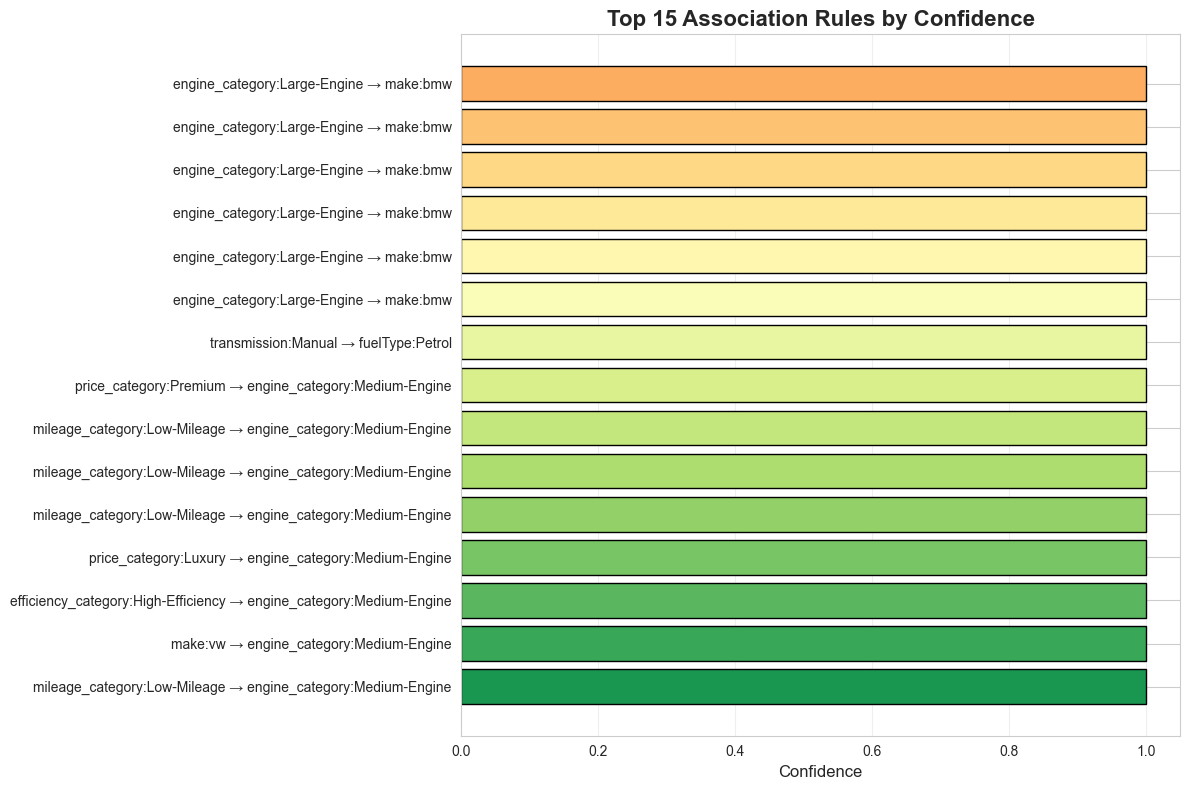

In [30]:
from visualisation import plot_association_rules_scatter, plot_top_rules

if not rules_df.empty:    
    # Scatter plot of support vs confidence
    plot_association_rules_scatter(
        rules_df,
        metric='lift',
        title='Association Rules: Support vs Confidence (sized by Lift)'
    )
    
    # Top rules by lift
    plot_top_rules(
        rules_df,
        metric='lift',
        top_n=15,
        title='Top 15 Association Rules by Lift'
    )
    
    # Top rules by confidence
    plot_top_rules(
        rules_df,
        metric='confidence',
        top_n=15,
        title='Top 15 Association Rules by Confidence'
    )